In [1]:
from __future__ import print_function
from __future__ import division
from __future__ import absolute_import

import numpy as np

from btk import btk

import matplotlib.pyplot as plt

In [2]:
#INITIALIZATION
reader = btk.btkAcquisitionFileReader() 
reader.SetFilename("CP_GMFCS1_01916_20130128_18.c3d") 
#reader.SetFilename("CP_GMFCS1_01969_20150407_13.c3d")
#from convert_to_csv import file_names
#reader.SetFilename(file_names[0][j])
reader.Update()
acq = reader.GetOutput()

In [3]:
# PARAMETERS
freq = acq.GetPointFrequency() # give the point frequency
print('freq : ', freq)
n_frames = acq.GetPointFrameNumber() # give the number of frames
print('n_frames : ', n_frames)
first_frame = acq.GetFirstFrame()
print('first_frame : ', first_frame)

# metadata
metadata = acq.GetMetaData()

# EVENTS
n_events = acq.GetEventNumber()
print('n_event : ', n_events) # NUMBER OF EVENTS IN SEQUENCE
event = acq.GetEvent(0) # GET EVENT OF SEQUENCE
label = event.GetLabel() # LABEL OF EVENT
print('label : ', label)
context = event.GetContext() # L/R FOOT
print('context : ', context)
event_frame = event.GetFrame() # FRAME IN WHICH EVENT OCCURED
print('event_frame : ', event_frame)

# get points
point_labels = metadata.FindChild("POINT").value().FindChild("LABELS").value().GetInfo().ToString()
print('labels :', point_labels) # ALL MARKERS
points = acq.GetPoints().GetItemNumber()
print('points : ', points) #NUMBER OF MARKERS

freq :  100.0
n_frames :  175
first_frame :  1
n_event :  4
label :  Foot_Strike_GS
context :  Left
event_frame :  15
labels : ('LFHD', 'RFHD', 'LBHD', 'RBHD', 'C7  ', 'T10 ', 'STRN', 'CLAV', 'RBAK', 'LSHO', 'LELB', 'LWRA', 'LWRB', 'RSHO', 'RELB', 'RWRA', 'RWRB', 'LASI', 'RASI', 'LPSI', 'RPSI', 'LTHI', 'RTHI', 'LKNE', 'RKNE', 'LTIB', 'RTIB', 'LANK', 'RANK', 'LHEE', 'RHEE', 'RTOE', 'LTOE')
points :  33


In [4]:
Frame = 0 #FRAME WE WANT TO EXTRACT
data_Frame = np.array([acq.GetPoint('LFHD').GetValues()[Frame,:],
                        acq.GetPoint('RFHD').GetValues()[Frame,:], 
                        acq.GetPoint('LBHD').GetValues()[Frame,:], 
                        acq.GetPoint('RBHD').GetValues()[Frame,:],
                        acq.GetPoint('C7').GetValues()[Frame,:],
                        acq.GetPoint('T10').GetValues()[Frame,:],
                        acq.GetPoint('STRN').GetValues()[Frame,:],
                        acq.GetPoint('CLAV').GetValues()[Frame,:],
                        acq.GetPoint('RBAK').GetValues()[Frame,:],
                        acq.GetPoint('LSHO').GetValues()[Frame,:],
                        acq.GetPoint('LELB').GetValues()[Frame,:],
                        acq.GetPoint('LWRA').GetValues()[Frame,:],
                        acq.GetPoint('LWRB').GetValues()[Frame,:],
                        acq.GetPoint('RSHO').GetValues()[Frame,:],
                        acq.GetPoint('RELB').GetValues()[Frame,:],
                        acq.GetPoint('RWRA').GetValues()[Frame,:],
                        acq.GetPoint('RWRB').GetValues()[Frame,:],
                        acq.GetPoint('LASI').GetValues()[Frame,:],
                        acq.GetPoint('RASI').GetValues()[Frame,:],
                        acq.GetPoint('LPSI').GetValues()[Frame,:],
                        acq.GetPoint('RPSI').GetValues()[Frame,:],
                        acq.GetPoint('LTHI').GetValues()[Frame,:],
                        acq.GetPoint('RTHI').GetValues()[Frame,:],
                        acq.GetPoint('LKNE').GetValues()[Frame,:],
                        acq.GetPoint('RKNE').GetValues()[Frame,:],
                        acq.GetPoint('LTIB').GetValues()[Frame,:],
                        acq.GetPoint('RTIB').GetValues()[Frame,:],
                        acq.GetPoint('LANK').GetValues()[Frame,:],
                        acq.GetPoint('RANK').GetValues()[Frame,:],
                        acq.GetPoint('LHEE').GetValues()[Frame,:],
                        acq.GetPoint('RHEE').GetValues()[Frame,:],
                        acq.GetPoint('RTOE').GetValues()[Frame,:],
                        acq.GetPoint('LTOE').GetValues()[Frame,:],
                        ])

print('array : ', data_Frame)
print('shape : ', data_Frame.shape)

array :  [[-491.84634399  326.95462036 1130.56311035]
 [-493.74237061  217.5110321  1111.96643066]
 [-636.17724609  336.46975708 1192.09765625]
 [-627.63543701  187.94882202 1155.7265625 ]
 [-719.41888428  295.95285034 1043.42504883]
 [-747.29528809  305.89129639  832.14758301]
 [-572.14215088  295.66607666  868.5713501 ]
 [-608.59387207  288.06329346  989.83789062]
 [-762.46862793  223.66691589  943.64428711]
 [-669.81970215  435.79193115 1006.3371582 ]
 [-715.88000488  526.31512451  819.84912109]
 [-651.66546631  581.16174316  626.53704834]
 [-714.37237549  581.79302979  620.17041016]
 [-698.46966553  153.14318848  999.80212402]
 [-761.0111084    87.42938232  826.36407471]
 [-605.97961426   21.09155464  730.68377686]
 [-650.86352539  -15.21179676  696.8493042 ]
 [-609.77606201  395.69848633  672.23266602]
 [-644.48504639  190.80319214  674.97698975]
 [-743.6930542   345.97113037  706.10870361]
 [-751.71099854  282.01705933  711.44952393]
 [-544.0378418   465.32189941  451.6680603 ]
 

In [6]:
# generalize to get an array of points for a set of frames
# get markers
markers = list()
start = False
for label in point_labels:
    label = label.replace(' ', '')
    if label == 'LFHD': #used C7
        start = True
    if label == 'CentreOfMass':
        break
    if start:
        markers.append(label)

print(point_labels)
print(len(markers))
print(markers)

# get events
n_events = acq.GetEventNumber()
event_frames = [acq.GetEvent(event).GetFrame() for event in range(n_events)]
event_frames.sort()
print(event_frames)
start_frame = event_frames[0]-first_frame
end_frame = event_frames[-1]-first_frame
print(start_frame, end_frame)

# get data for each marker
data = [[acq.GetPoint(marker).GetValues()[frame,:] for marker in markers] for frame in range(start_frame, end_frame+1)]
data = np.array(data)
print(data.shape)
print(np.count_nonzero(np.isnan(data)))
#print(data)

('LFHD', 'RFHD', 'LBHD', 'RBHD', 'C7  ', 'T10 ', 'STRN', 'CLAV', 'RBAK', 'LSHO', 'LELB', 'LWRA', 'LWRB', 'RSHO', 'RELB', 'RWRA', 'RWRB', 'LASI', 'RASI', 'LPSI', 'RPSI', 'LTHI', 'RTHI', 'LKNE', 'RKNE', 'LTIB', 'RTIB', 'LANK', 'RANK', 'LHEE', 'RHEE', 'RTOE', 'LTOE')
33
['LFHD', 'RFHD', 'LBHD', 'RBHD', 'C7', 'T10', 'STRN', 'CLAV', 'RBAK', 'LSHO', 'LELB', 'LWRA', 'LWRB', 'RSHO', 'RELB', 'RWRA', 'RWRB', 'LASI', 'RASI', 'LPSI', 'RPSI', 'LTHI', 'RTHI', 'LKNE', 'RKNE', 'LTIB', 'RTIB', 'LANK', 'RANK', 'LHEE', 'RHEE', 'RTOE', 'LTOE']
[15, 62, 72, 120]
14 119
(106, 33, 3)
0


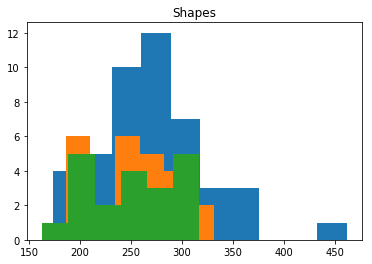

In [7]:
from os import listdir
from os.path import isfile, join
from collections import defaultdict

folders = ["CP", "FD", "ITW"]
mypath = "/Users/kieranschubert/Desktop/Statistics/2nd_Semester/Data_Mining/2019/Sofamehack2019/Sub_DB_Checked/"
file_names = {}

for i in range(0, len(folders)):
	path = mypath + folders[i]
	file_names[i] = [f for f in listdir(path) if isfile(join(path, f))]


#INITIALIZATION
CP = {}
CP_shapes = {}
CP_labels = defaultdict(dict)
CP_context = defaultdict(dict)
FD = {}
FD_shapes = {}
FD_labels = defaultdict(dict)
FD_context = defaultdict(dict)
ITW = {}
ITW_shapes = {}
ITW_labels = defaultdict(dict)
ITW_context = defaultdict(dict)

reader = btk.btkAcquisitionFileReader() 
for i in range(0, len(file_names.keys())):
    
    for j in range(0, len(file_names[i])):
        
        k = 0
        
        reader.SetFilename(file_names[i][j]) 
        reader.Update()
        acq = reader.GetOutput()

        markers = list()
        start = False
        for label in point_labels:
            label = label.replace(' ', '')
            if label == 'LFHD': #used C7
                start = True
            if label == 'CentreOfMass':
                break
            if start:
                markers.append(label)

        # get events
        end_frame = acq.GetPointFrameNumber() # give the number of frames
        first_frame = acq.GetFirstFrame()
        #start_frame = event_frames[0]-first_frame
        #end_frame = event_frames[-1]-first_frame
        
        n_events = acq.GetEventNumber()
        events = [acq.GetEvent(event) for event in range(n_events)]
        event_frames = [acq.GetEvent(event).GetFrame() for event in range(n_events)]
        event_frames.sort()
        event_labels = [acq.GetEvent(event).GetLabel() for event in range(n_events)]
        event_context = [acq.GetEvent(event).GetContext() for event in range(n_events)]
        
        ''' 
        print(event_frames)
        print(event_labels)
        print(event_context)'''
        
        
        # get data for each marker
        data = [[acq.GetPoint(marker).GetValues()[frame,:] for marker in markers] for frame in range(first_frame, end_frame)]
        
        if i == 0:
            CP[j] = np.array(data)
            CP_shapes[j] = CP[j].shape
            
            for h in range(0, CP_shapes[j][0]): #loop through all frames of individual j
                
                if k < len(event_frames) and event_frames[k] == h:
                    label = np.repeat(event_labels[k], CP[j][h].shape[0])
                    context = np.repeat(event_context[k], CP[j][h].shape[0])
                    CP_labels[j][h] = label
                    CP_context[j][h] = context
                    k += 1      
                else:  
                    CP_labels[j][h] = np.zeros(CP[j][h].shape[0])
                    CP_context[j][h] = np.zeros(CP[j][h].shape[0])
                    
            #print(np.count_nonzero(np.isnan(data)))
            
        elif i == 1:
            FD[j] = np.array(data)
            FD_shapes[j] = FD[j].shape
            
            for h in range(0, FD_shapes[j][0]): #loop through all frames of individual j
                
                if k < len(event_frames) and event_frames[k] == h:
                    label = np.repeat(event_labels[k], FD[j][h].shape[0])
                    context = np.repeat(event_context[k], FD[j][h].shape[0])
                    FD_labels[j][h] = label
                    FD_context[j][h] = context
                    k += 1      
                else: 
                    FD_labels[j][h] = np.zeros(FD[j][h].shape[0])
                    FD_context[j][h] = np.zeros(FD[j][h].shape[0])

            #print(np.count_nonzero(np.isnan(data)))
            
        else:
            ITW[j] = np.array(data)
            ITW_shapes[j] = ITW[j].shape
            
            for h in range(0, ITW_shapes[j][0]): #loop through all frames of individual j
                
                if k < len(event_frames) and event_frames[k] == h:
                    label = np.repeat(event_labels[k], ITW[j][h].shape[0])
                    context = np.repeat(event_context[k], ITW[j][h].shape[0])
                    ITW_labels[j][h] = label
                    ITW_context[j][h] = context
                    k += 1      
                else: 
                    ITW_labels[j][h] = np.zeros(ITW[j][h].shape[0])
                    ITW_context[j][h] = np.zeros(ITW[j][h].shape[0])
            
            #print(np.count_nonzero(np.isnan(data)))

    
plt.hist([item[0] for item in CP_shapes.values()], bins='auto')
plt.title('Shapes')
plt.hist([item[0] for item in FD_shapes.values()], bins='auto')
plt.hist([item[0] for item in ITW_shapes.values()], bins='auto')
plt.show()

In [ ]:
CP[0].shape #first CP patient, 174 time points, 33 variables measured, 3 space coordinates

In [ ]:
CP[0][0] #first frame of first CP patient

In [8]:
# GET LABELS AND CONTEXT OF EVENTS
CP_labels_all = []
CP_context_all = []
for i in range(0, len(CP_labels.keys())):
    for j in range(0, len(CP_labels[i])):
        CP_labels_all.append(np.vstack(CP_labels[i][j][:]))
        CP_context_all.append(np.vstack(CP_context[i][j][:]))
    
CP_labels_all = np.array(CP_labels_all)
CP_labels_all = np.vstack(CP_labels_all)
CP_context_all = np.array(CP_context_all)
CP_context_all = np.vstack(CP_context_all)

FD_labels_all = []
FD_context_all = []
for i in range(0, len(FD_labels.keys())):
    for j in range(0, len(FD_labels[i])):
        FD_labels_all.append(np.vstack(FD_labels[i][j][:]))
        FD_context_all.append(np.vstack(FD_context[i][j][:]))
    
FD_labels_all = np.array(FD_labels_all)
FD_labels_all = np.vstack(FD_labels_all)
FD_context_all = np.array(FD_context_all)
FD_context_all = np.vstack(FD_context_all)

ITW_labels_all = []
ITW_context_all = []
for i in range(0, len(ITW_labels.keys())):
    for j in range(0, len(ITW_labels[i])):
        ITW_labels_all.append(np.vstack(ITW_labels[i][j][:]))
        ITW_context_all.append(np.vstack(ITW_context[i][j][:]))
    
ITW_labels_all = np.array(ITW_labels_all)
ITW_labels_all = np.vstack(ITW_labels_all)
ITW_context_all = np.array(ITW_context_all)
ITW_context_all = np.vstack(ITW_context_all)

In [9]:
#SAVE INDIVIDUAL PATIENTS IN CSV, ALL THEIR FRAMES CONCATENATED WITH LABELS AND CONTEXT, NANs REMOVED

CP_patients = {}
FD_patients = {}
ITW_patients = {}

CP_labels_patients = {}
FD_labels_patients = {}
ITW_labels_patients = {}

CP_context_patients = {}
FD_context_patients = {}
ITW_context_patients = {}

for i in range(0, len(CP.keys())):
    CP_selected = CP[i][0]
    CP_labels_selected = CP_labels[i][0]
    CP_context_selected = CP_context[i][0]
    for j in range(1, len(CP[i])):
        CP_selected = np.append(CP_selected, CP[i][j], axis=0)
        CP_labels_selected = np.append(CP_labels_selected, CP_labels[i][j], axis=0)
        CP_context_selected = np.append(CP_context_selected, CP_context[i][j], axis=0)
    
    CP_labels_selected = CP_labels_selected[~np.isnan(CP_selected).any(axis=1)]
    CP_context_selected = CP_context_selected[~np.isnan(CP_selected).any(axis=1)]
    CP_selected = CP_selected[~np.isnan(CP_selected).any(axis=1)]
    CP_labels_patients[i] = CP_labels_selected
    CP_context_patients[i] = CP_context_selected
    CP_patients[i] = CP_selected
    
    out_CP = np.column_stack((CP_patients[i], CP_labels_patients[i], CP_context_patients[i]))
    np.savetxt("CP_patient" + `i` + ".csv", out_CP, fmt="%s", delimiter=",")
    
for i in range(0, len(FD.keys())):
    FD_selected = FD[i][0]
    FD_labels_selected = FD_labels[i][0]
    FD_context_selected = FD_context[i][0]
    for j in range(1, len(FD[i])):
        FD_selected = np.append(FD_selected, FD[i][j], axis=0)
        FD_labels_selected = np.append(FD_labels_selected, FD_labels[i][j], axis=0)
        FD_context_selected = np.append(FD_context_selected, FD_context[i][j], axis=0)
    
    FD_labels_selected = FD_labels_selected[~np.isnan(FD_selected).any(axis=1)]
    FD_context_selected = FD_context_selected[~np.isnan(FD_selected).any(axis=1)]
    FD_selected = FD_selected[~np.isnan(FD_selected).any(axis=1)]
    FD_labels_patients[i] = FD_labels_selected
    FD_context_patients[i] = FD_context_selected
    FD_patients[i] = FD_selected
    
    out_FD = np.column_stack((FD_patients[i], FD_labels_patients[i], FD_context_patients[i]))
    np.savetxt("FD_patient" + `i` + ".csv", out_FD, fmt="%s", delimiter=",")

for i in range(0, len(ITW.keys())):
    ITW_selected = ITW[i][0]
    ITW_labels_selected = ITW_labels[i][0]
    ITW_context_selected = ITW_context[i][0]
    for j in range(1, len(ITW[i])):
        ITW_selected = np.append(ITW_selected, ITW[i][j], axis=0)
        ITW_labels_selected = np.append(ITW_labels_selected, ITW_labels[i][j], axis=0)
        ITW_context_selected = np.append(ITW_context_selected, ITW_context[i][j], axis=0)
    
    ITW_labels_selected = ITW_labels_selected[~np.isnan(ITW_selected).any(axis=1)]
    ITW_context_selected = ITW_context_selected[~np.isnan(ITW_selected).any(axis=1)]
    ITW_selected = ITW_selected[~np.isnan(ITW_selected).any(axis=1)]
    ITW_labels_patients[i] = ITW_labels_selected
    ITW_context_patients[i] = ITW_context_selected
    ITW_patients[i] = ITW_selected
    
    out_ITW = np.column_stack((ITW_patients[i], ITW_labels_patients[i], ITW_context_patients[i]))
    np.savetxt("ITW_patient" + `i` + ".csv", out_ITW, fmt="%s", delimiter=",")

In [10]:
#MERGED PATIENT DATA FOR EACH DISORDER

CP_merged = np.column_stack((CP_patients[0], CP_labels_patients[0], CP_context_patients[0]))
for i in range(1, len(CP_patients.keys())):
    CP_merged = np.append(CP_merged, np.column_stack((CP_patients[i], CP_labels_patients[i], CP_context_patients[i])), axis=0)
    
print(CP_merged.shape)

FD_merged = np.column_stack((FD_patients[0], FD_labels_patients[0], FD_context_patients[0]))
for i in range(1, len(FD_patients.keys())):
    FD_merged = np.append(FD_merged, np.column_stack((FD_patients[i], FD_labels_patients[i], FD_context_patients[i])), axis=0)

    
print(FD_merged.shape)

ITW_merged = np.column_stack((ITW_patients[0], ITW_labels_patients[0], ITW_context_patients[0]))
for i in range(1, len(ITW_patients.keys())):
    ITW_merged = np.append(ITW_merged, np.column_stack((ITW_patients[i], ITW_labels_patients[i], ITW_context_patients[i])), axis=0)
    
print(ITW_merged.shape)

print(CP_labels_all.shape)
print(CP_context_all.shape)
print(FD_labels_all.shape)
print(FD_context_all.shape)
print(ITW_labels_all.shape)
print(ITW_context_all.shape)

(402284, 5)
(208527, 5)
(164769, 5)
(402336, 1)
(402336, 1)
(208527, 1)
(208527, 1)
(164769, 1)
(164769, 1)


In [11]:
np.savetxt("CP_merged.csv", CP_merged, fmt="%s", delimiter=",")
np.savetxt("FD_merged.csv", FD_merged, fmt="%s", delimiter=",")
np.savetxt("ITW_merged.csv", ITW_merged, fmt="%s", delimiter=",")

In [14]:
print(CP_merged.shape)
print(FD_merged.shape)
print(ITW_merged.shape)

print(CP_merged.shape[0]+FD_merged.shape[0]+ITW_merged.shape[0])

(402284, 5)
(208527, 5)
(164769, 5)
775580
